In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
list_object = []
for col in train.columns:
    if train[col].dtype == 'object':
        list_object.append(col)

In [13]:
train.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

## Univariate Study

In [7]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.882876
Kurtosis: 6.536282


C:\Users\wlyip\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


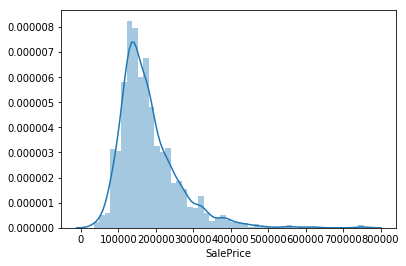

In [11]:
sns.distplot(train['SalePrice'])
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

deviate from normal distribution<br>
have positive skewness<br>
show peakedness

### Relationship with Numerical Variables

           SalePrice  GrLivArea
SalePrice   1.000000   0.708624
GrLivArea   0.708624   1.000000


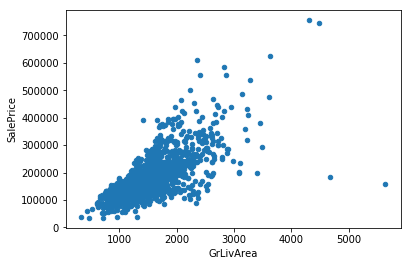

In [13]:
var = 'GrLivArea'
data = train[['SalePrice', var]]
data.plot.scatter(x=var, y='SalePrice')
print(data.corr())

positive linear relationship

             SalePrice  TotalBsmtSF
SalePrice     1.000000     0.613581
TotalBsmtSF   0.613581     1.000000


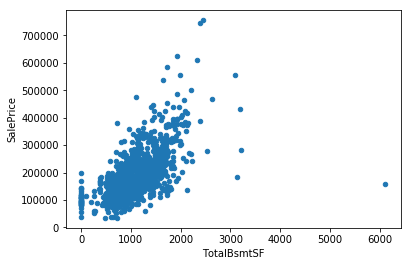

In [14]:
var = 'TotalBsmtSF'
data = train[['SalePrice', var]]
data.plot.scatter(x=var, y='SalePrice')
print(data.corr())

no relation at TotalBsmtSF=0<br>
then a exponential relation<br>
sometimes give zero credit to SalePrice

## Relationship with Categorical Variables

Text(0.5,1,'Overall Qual vs Sale Price')

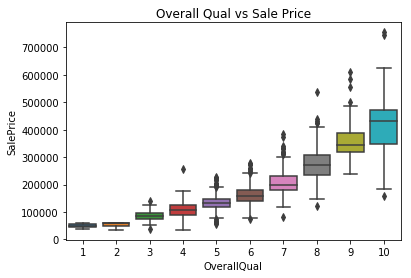

In [16]:
var = 'OverallQual'
data = train[['SalePrice', var]]
sns.boxplot(data=data, x=var, y='SalePrice')
plt.title('Overall Qual vs Sale Price')

Text(0.5,1,'Year Built vs Sale Price')

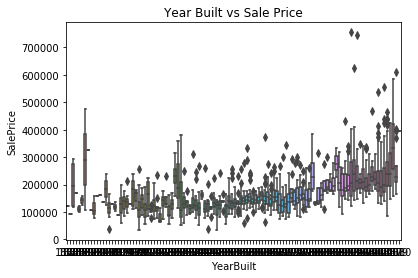

In [17]:
var = 'YearBuilt'
data = train[['SalePrice', var]]
sns.boxplot(data=data, x=var, y='SalePrice')
plt.title('Year Built vs Sale Price')

no strong tendency

## Categorical Variables

In [7]:
list_object = []
for col in train.columns:
    if train[col].dtype == 'object':
        list_object.append(col)
print('number of categorical features:', len(list_object))

list_number = list(train.columns)
for col in list_object:
    list_number.remove(col)
print('number of numerical features:', len(list_number))

number of categorical features: 43
number of numerical features: 38


In [8]:
# create a table for categorical variables
cat_stat = pd.DataFrame(columns=['variable', 'values', 'value_count_incna',
                                'value_count_nona', 'num_miss', 'pct_miss'])
tmp = pd.DataFrame()
for col in list_object:
    tmp['variable'] = [col]
    tmp['values'] = [train[col].unique()]
    tmp['value_count_incna'] = len(list(train[col].unique()))
    tmp['value_count_nona'] = int(train[col].nunique())
    tmp['num_miss'] = train[col].isnull().sum()
    tmp['pct_miss'] = (train[col].isnull().sum()/len(train)).round(3)*100
    
    cat_stat = cat_stat.append(tmp, sort=False)
    
cat_stat

,variable,values,value_count_incna,value_count_nona,num_miss,pct_miss
0,MSZoning,"[RL, RM, C (all), FV, RH]",5,5,0,0.0
0,Street,"[Pave, Grvl]",2,2,0,0.0
0,Alley,"[nan, Grvl, Pave]",3,2,1369,93.8
0,LotShape,"[Reg, IR1, IR2, IR3]",4,4,0,0.0
0,LandContour,"[Lvl, Bnk, Low, HLS]",4,4,0,0.0
0,Utilities,"[AllPub, NoSeWa]",2,2,0,0.0
0,LotConfig,"[Inside, FR2, Corner, CulDSac, FR3]",5,5,0,0.0
0,LandSlope,"[Gtl, Mod, Sev]",3,3,0,0.0
0,Neighborhood,"[CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ...",25,25,0,0.0
0,Condition1,"[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ...",9,9,0,0.0


In [9]:
# sort the table by value_count_incna acsendingly
cat_stat.sort_values(by='value_count_incna', inplace=True, ascending=True)
cat_stat.set_index('variable', inplace=True)

cat_stat

,values,value_count_incna,value_count_nona,num_miss,pct_miss
variable,,,,,
Street,"[Pave, Grvl]",2,2,0,0.0
CentralAir,"[Y, N]",2,2,0,0.0
Utilities,"[AllPub, NoSeWa]",2,2,0,0.0
Alley,"[nan, Grvl, Pave]",3,2,1369,93.8
LandSlope,"[Gtl, Mod, Sev]",3,3,0,0.0
PavedDrive,"[Y, N, P]",3,3,0,0.0
PoolQC,"[nan, Ex, Fa, Gd]",4,3,1453,99.5
KitchenQual,"[Gd, TA, Ex, Fa]",4,4,0,0.0
GarageFinish,"[RFn, Unf, Fin, nan]",4,3,81,5.5


In [12]:
cat_stat.sort_values(by='pct_miss', ascending=False)

,values,value_count_incna,value_count_nona,num_miss,pct_miss
variable,,,,,
PoolQC,"[nan, Ex, Fa, Gd]",4,3,1453,99.5
MiscFeature,"[nan, Shed, Gar2, Othr, TenC]",5,4,1406,96.3
Alley,"[nan, Grvl, Pave]",3,2,1369,93.8
Fence,"[nan, MnPrv, GdWo, GdPrv, MnWw]",5,4,1179,80.8
FireplaceQu,"[nan, TA, Gd, Fa, Ex, Po]",6,5,690,47.3
GarageQual,"[TA, Fa, Gd, nan, Ex, Po]",6,5,81,5.5
GarageCond,"[TA, Fa, nan, Gd, Po, Ex]",6,5,81,5.5
GarageFinish,"[RFn, Unf, Fin, nan]",4,3,81,5.5
GarageType,"[Attchd, Detchd, BuiltIn, CarPort, nan, Basmen...",7,6,81,5.5


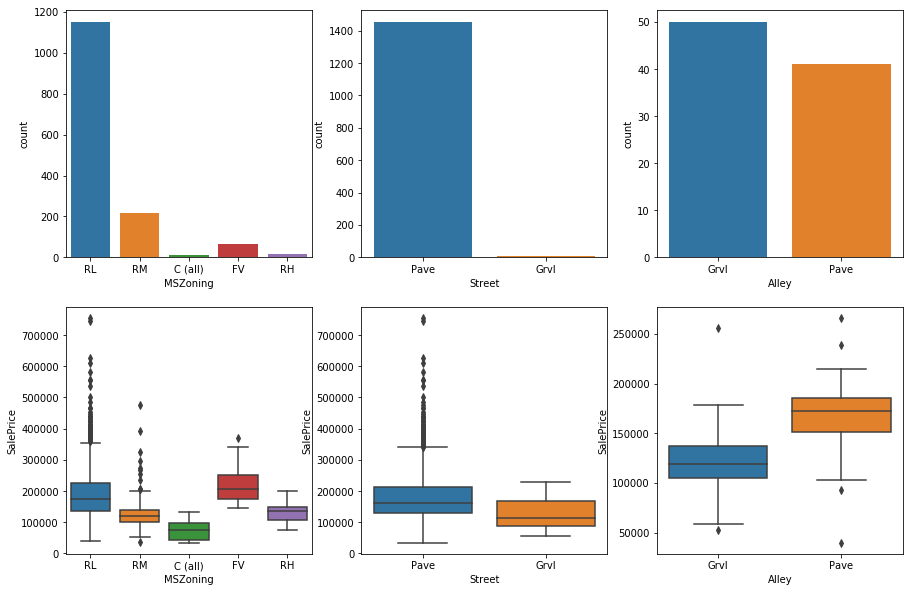

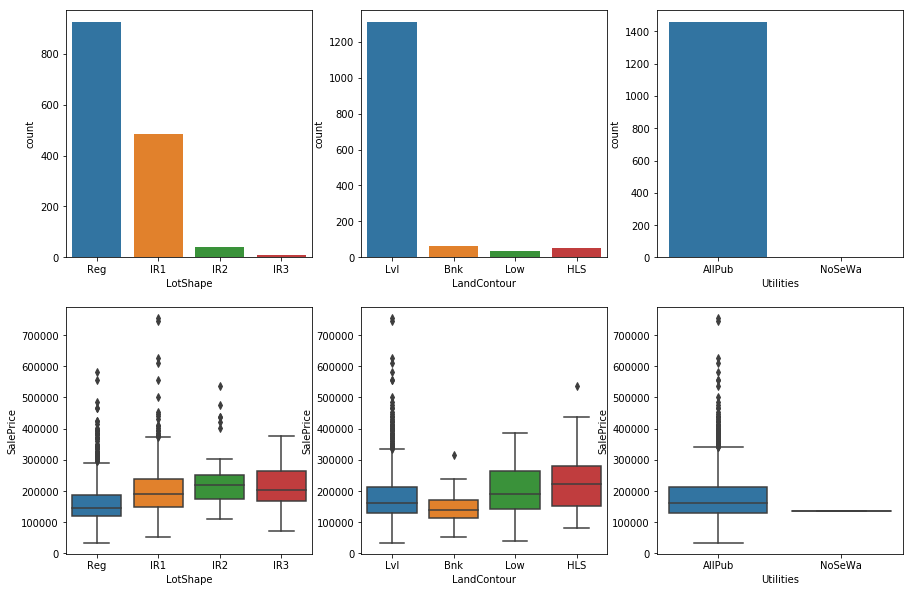

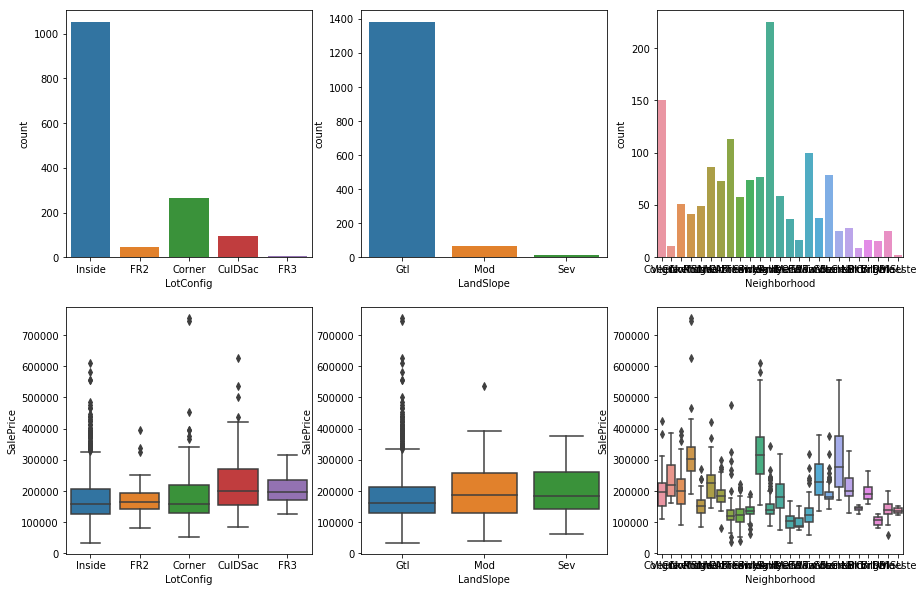

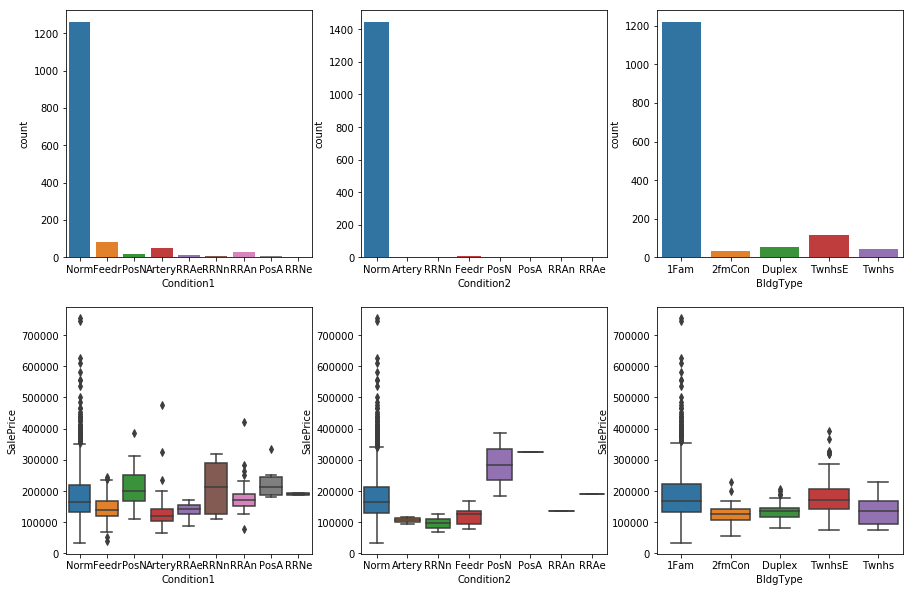

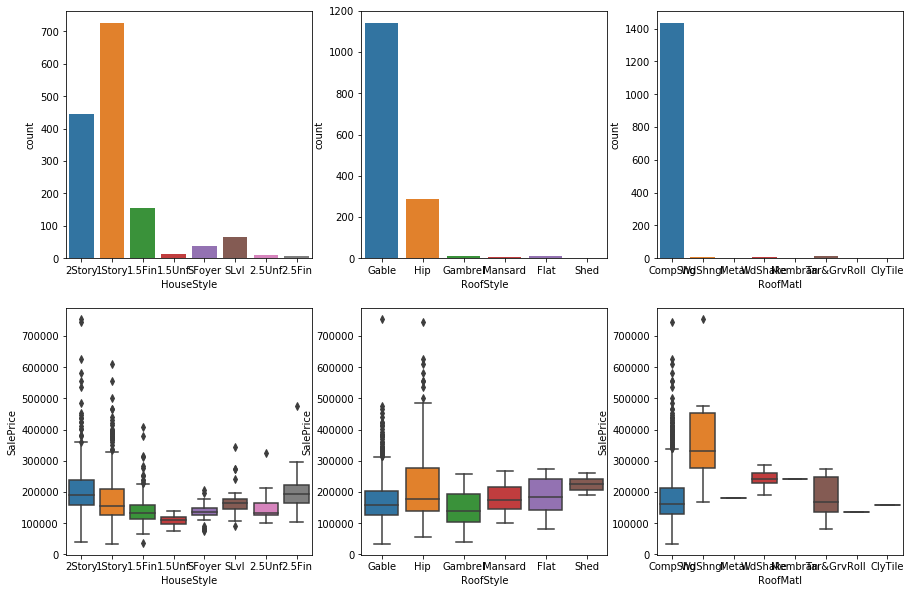

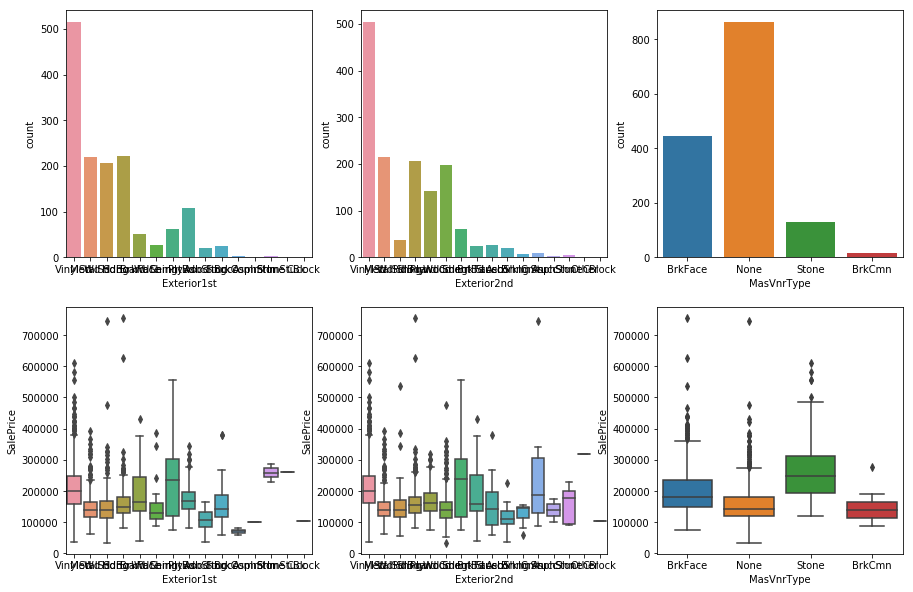

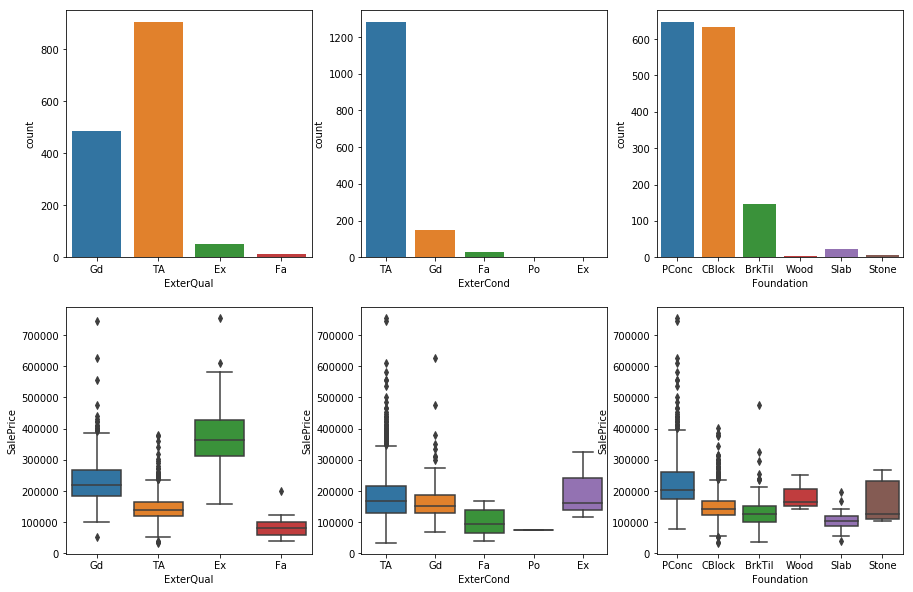

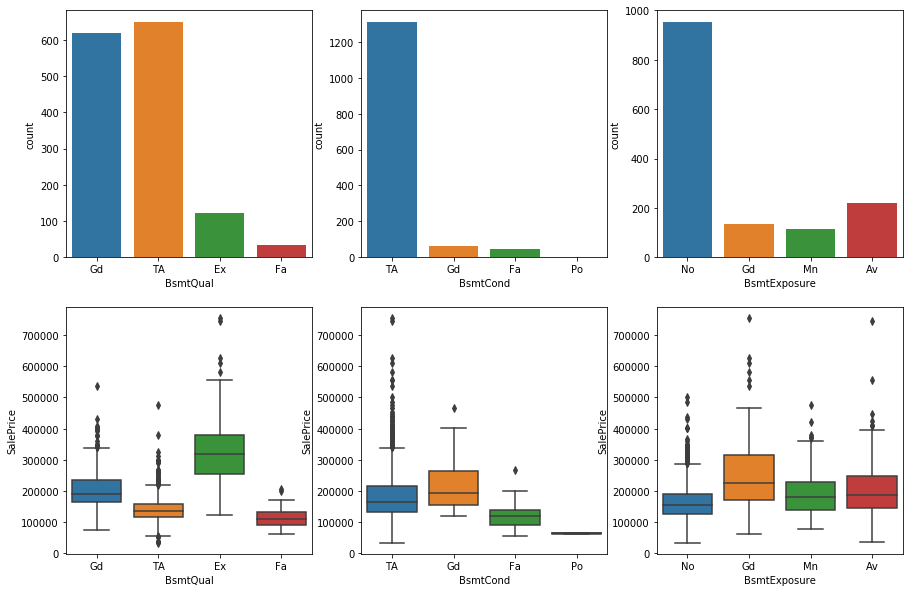

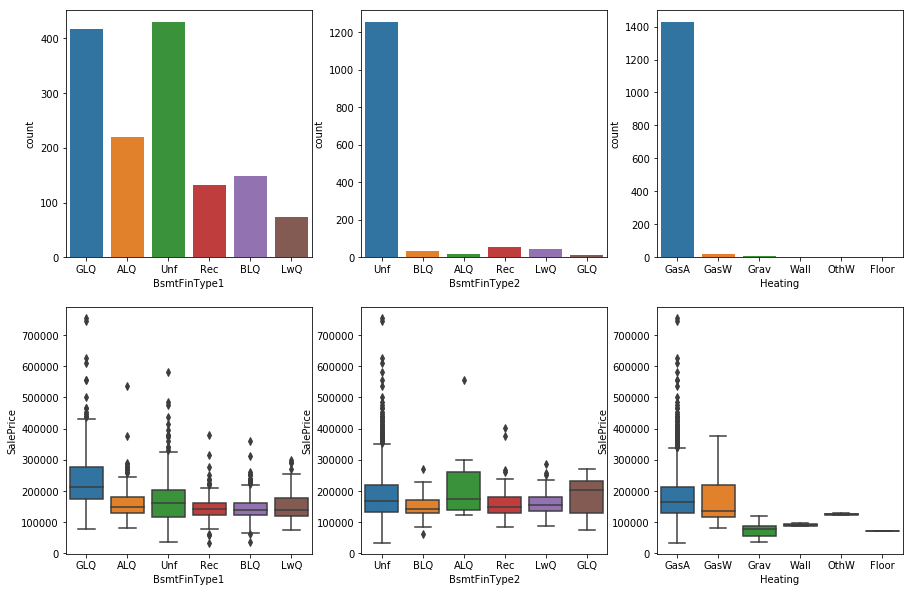

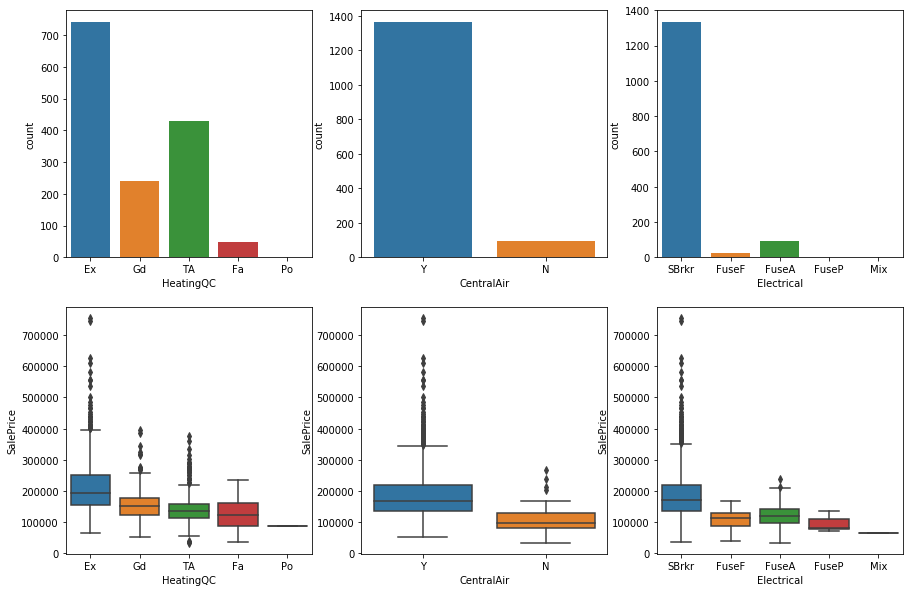

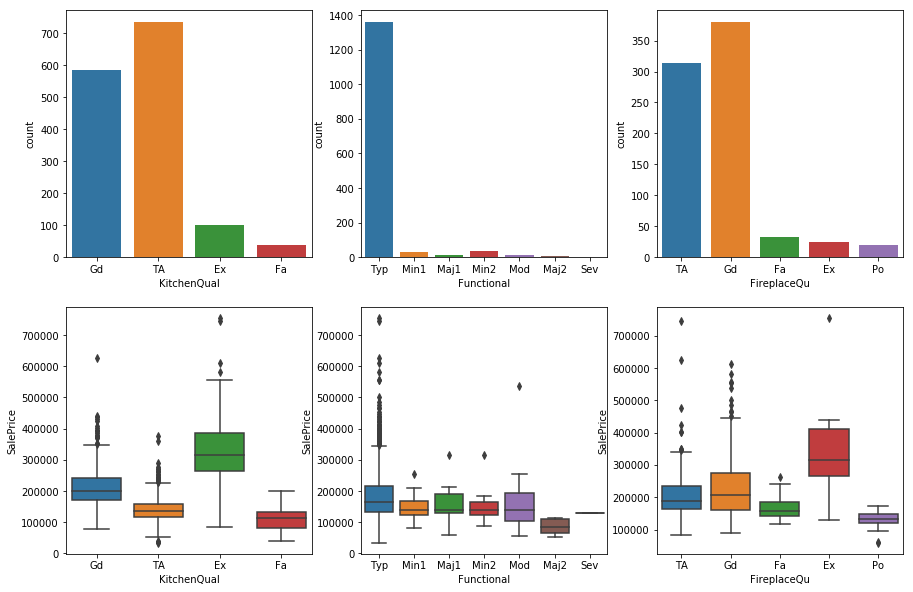

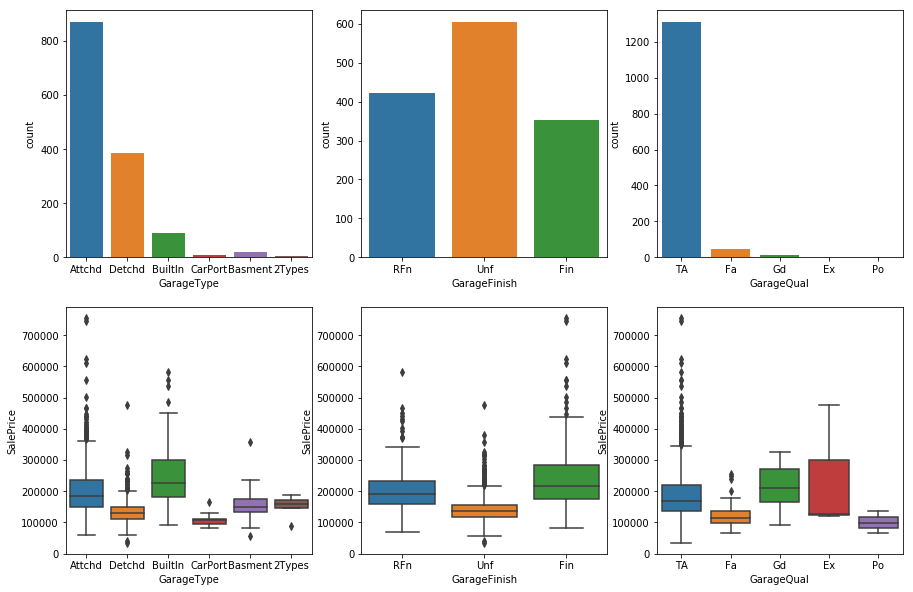

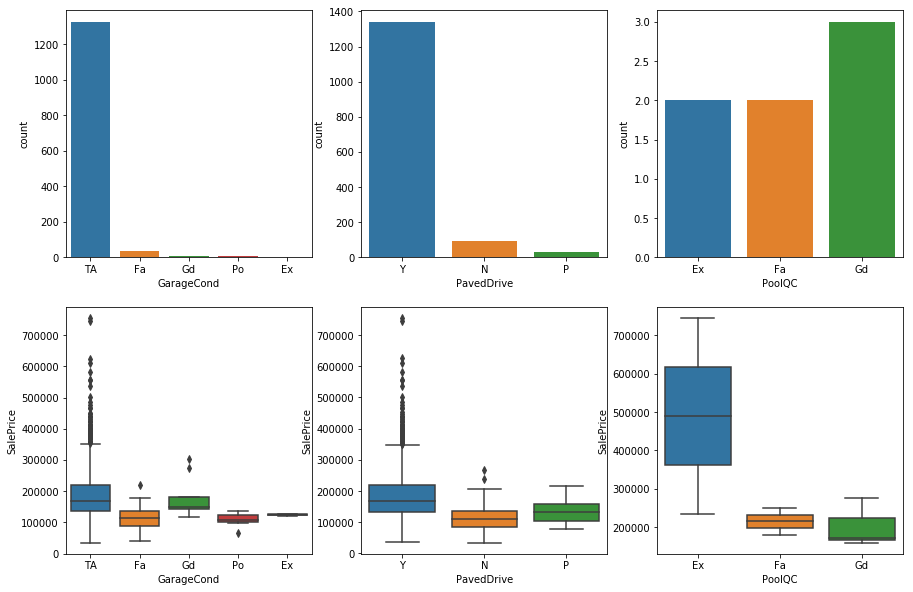

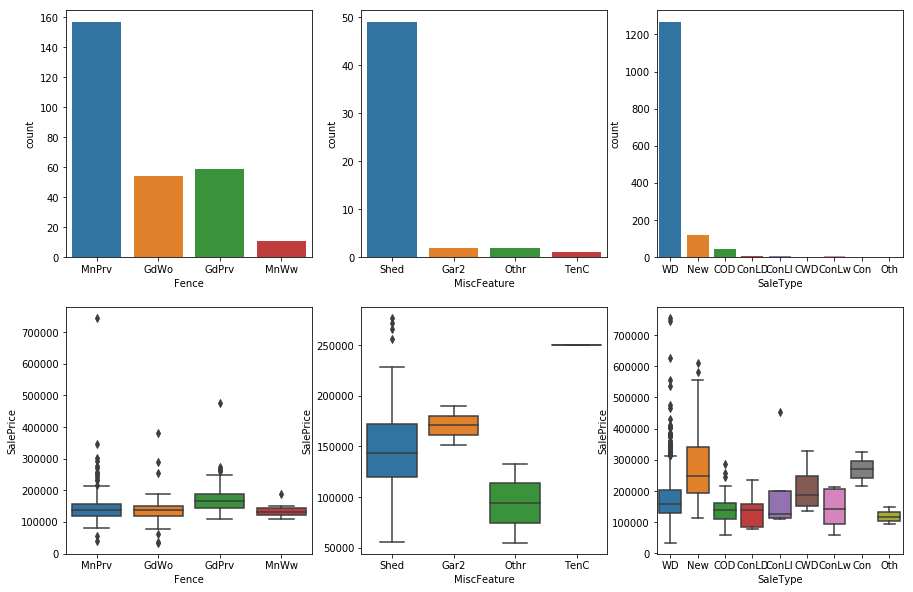

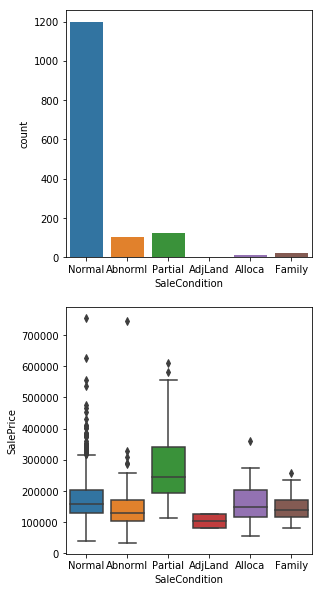

In [11]:
ix = 1
fig = plt.figure(figsize=(15, 10))
for col in list_object:
    if ix <= 3:
        ax1 = fig.add_subplot(2, 3, ix)
        sns.countplot(data=train, x=col, ax=ax1)
        ax2 = fig.add_subplot(2, 3, ix+3)
        sns.boxplot(data=train, x=col, y='SalePrice', ax=ax2)
        
    ix += 1
    if ix == 4:
        fig = plt.figure(figsize=(15, 10))
        ix = 1

## Correlation matrix

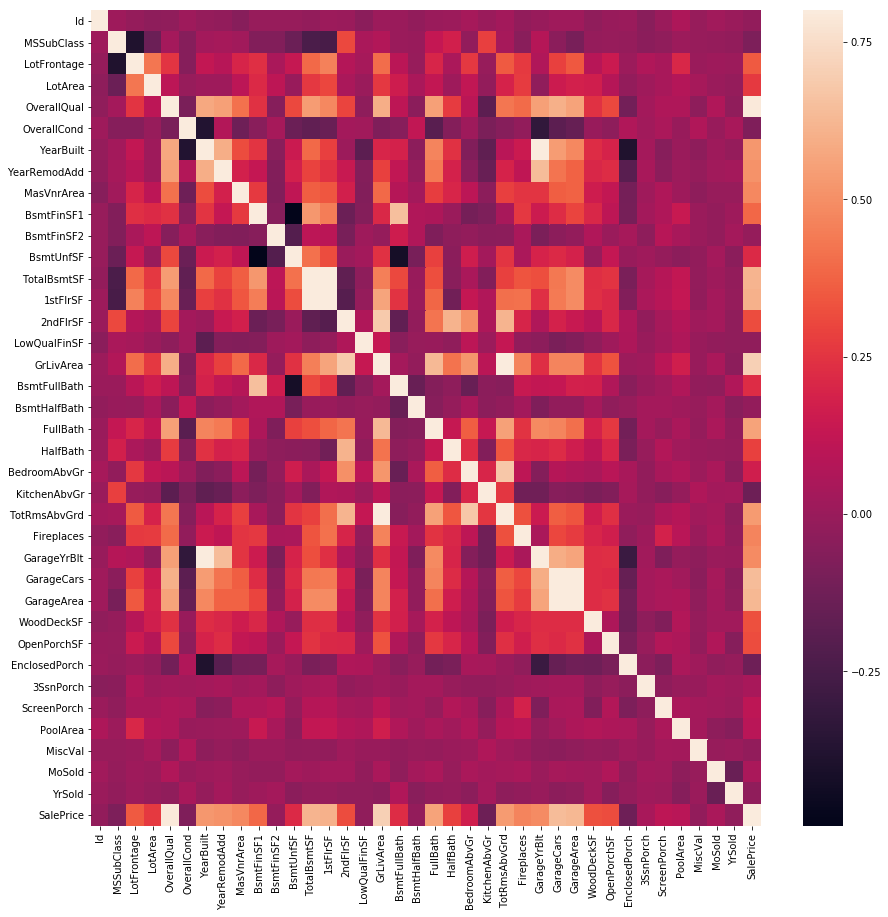

In [20]:
corrmat = train.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corrmat, vmax=.8)

(TotalBsmtSF, 1stFirSF), (GarageCars, GarageArea) may have multicollinearity

### SalePrice Correlation Matrix (zoomed style)

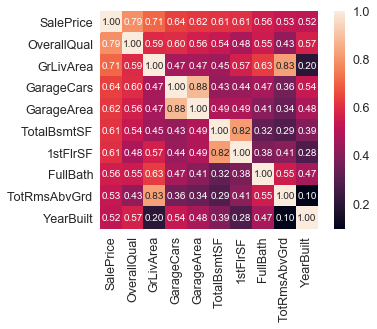

In [29]:
k = 10
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True, 
            fmt='.2f', annot_kws={'size': 10}, 
            yticklabels=cols.values, xticklabels=cols.values)

OverallQual, GrLivArea are highly correlated to SalePrice<br>
GarageCars, GarageArea should be the same, and we just need one. GarageCars has higher correlation, so we keep GarageCars<br>
One of the TotalBsmtSF, 1stFlrSF should be dropped as the same reason. We keep TotalBsmtSF<br>

### Scatter Plot between SalePrice and most correlated Variables

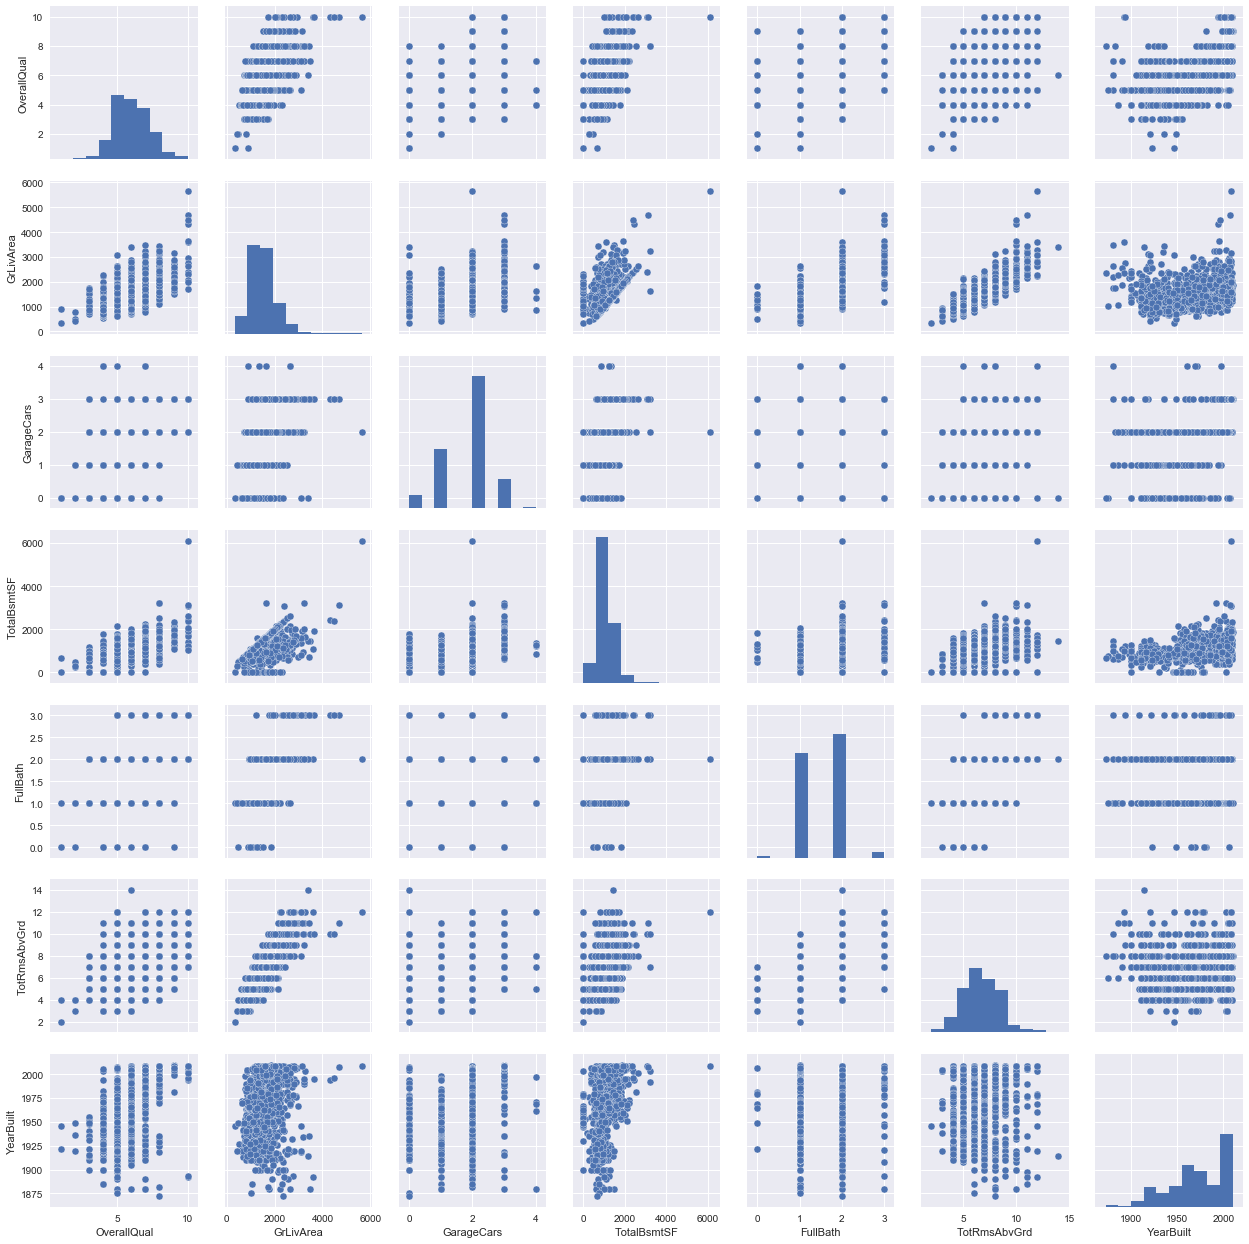

In [39]:
sns.set()
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 
        'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(train[cols])

## Missing Data

In [43]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [41]:
(train['MSSubClass']).value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [50]:
train = train.drop((missing_data[missing_data['Total'] > 1]).index, axis=1)
train = train.drop(train.loc[train['Electrical'].isnull()].index)
train.isnull().sum().max()

0

## Outliers

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
saleprice_scaled = StandardScaler().fit_transform(train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


C:\Users\wlyip\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\wlyip\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


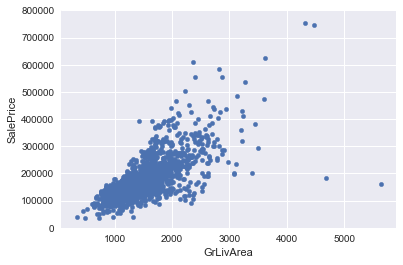

In [56]:
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [57]:
#deleting points
train.sort_values(by = 'GrLivArea', ascending = False)[:2]
train = train.drop(train[train['Id'] == 1299].index)
train = train.drop(train[train['Id'] == 524].index)

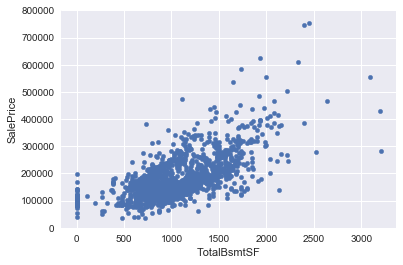

In [58]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

C:\Users\wlyip\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


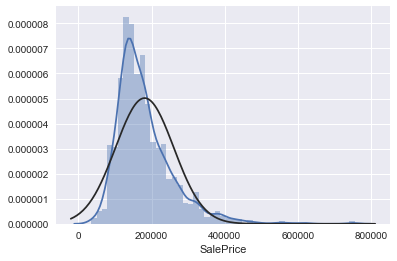

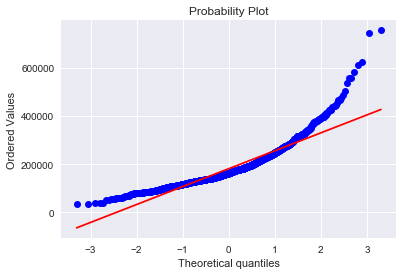

In [64]:
from scipy import stats

#histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [65]:
#applying log transformation
train['SalePrice'] = np.log(train['SalePrice'])

C:\Users\wlyip\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


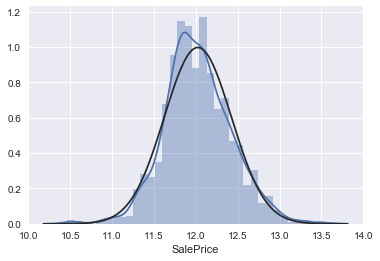

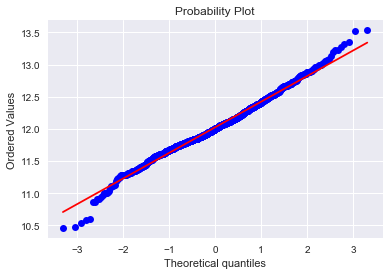

In [66]:
#transformed histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

C:\Users\wlyip\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


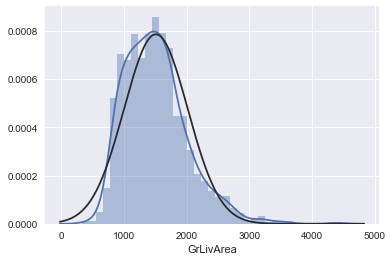

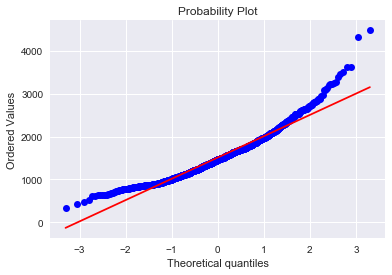

In [67]:
#histogram and normal probability plot
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

In [69]:
#data transformation
train['GrLivArea'] = np.log(train['GrLivArea'])

C:\Users\wlyip\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


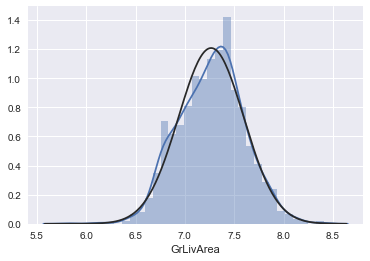

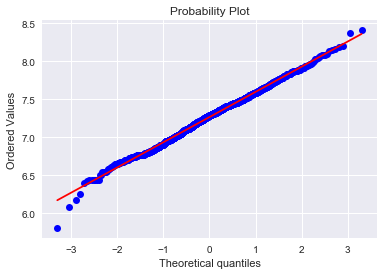

In [70]:
#transformed histogram and normal probability plot
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

C:\Users\wlyip\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


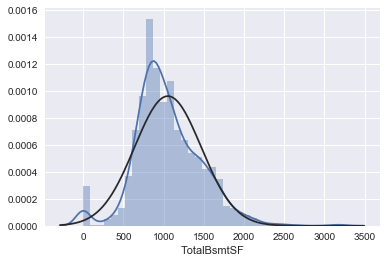

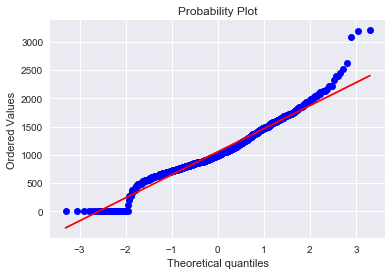

In [71]:
#histogram and normal probability plot
sns.distplot(train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

In [72]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
train['HasBsmt'] = pd.Series(len(train['TotalBsmtSF']), index=train.index)
train['HasBsmt'] = 0 
train.loc[train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [73]:
#transform data
train.loc[train['HasBsmt']==1,'TotalBsmtSF'] = np.log(train['TotalBsmtSF'])

C:\Users\wlyip\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


C:\Users\wlyip\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


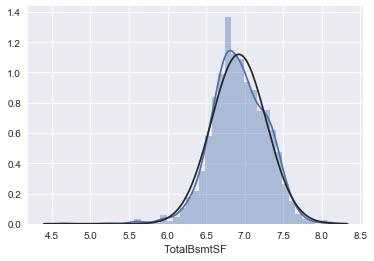

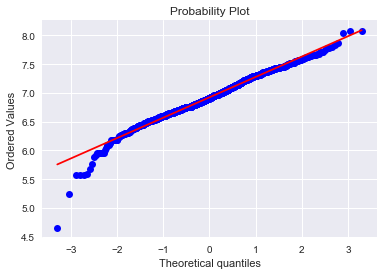

In [74]:
#histogram and normal probability plot
sns.distplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

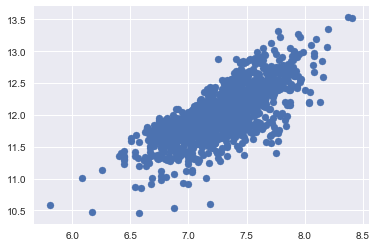

In [75]:
#scatter plot
plt.scatter(train['GrLivArea'], train['SalePrice']);

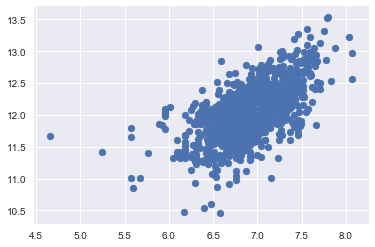

In [77]:
#scatter plot
plt.scatter(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], train[train['TotalBsmtSF']>0]['SalePrice']);

In [78]:
#convert categorical variable into dummy
train = pd.get_dummies(train)

In [79]:
train.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=222)